In [ ]:
%pip install --upgrade networkx
import networkx as nx
import matplotlib.pyplot as plt
from nxviz import annotate, highlights
import numpy as np
import seaborn as sns
import pandas as pd

In [50]:
def get_graph(path: str):
    """
        Processa arquivos .txt para gerar grafos a partir de seus pontos de entrada e saída, 
        além de determinar demais métricas de um grafo e retorná-las.

        Args:
            path (str): Caminho para o .txt.
            
        Returns:
            list_return (list[obj]): Retorna lista de métricas do grafo em seus respectivos
                formatos.
    """
    
    graph = path.split('\\')[-1].split('.')[0]
    print("Grafo: ",graph)
    # Lê o arquivo .txt e cria o grafo direcionado
    G = nx.read_edgelist(path, create_using=nx.DiGraph(), nodetype=int)
    print("\nA rede tem {} nós e {} arestas".format(G.number_of_nodes(), G.number_of_edges()))

    # 1. Quantidade de vértices
    num_vertices = G.number_of_nodes()
    print("Quantidade de vértices:", num_vertices)

    # 2. Quantidade de arestas
    num_arestas = G.number_of_edges()
    print("Quantidade de arestas:", num_arestas)

    # 3. Quantidade de componentes conectados
    componentes_conectados = list(nx.weakly_connected_components(G))
    num_componentes = len(componentes_conectados)
    print("Quantidade de componentes conectados:", num_componentes)

    # 4. Tamanho do GCC (Componente Gigante Conectado)
    gcc = max(componentes_conectados, key=len)
    tamanho_gcc = len(gcc)
    print("Tamanho do GCC:", tamanho_gcc)

    # 5. Coeficiente de clustering
    clustering_coefficient = nx.average_clustering(G)
    print("Coeficiente de Clustering:", clustering_coefficient)

    # 6. Coeficiente de Assortatividade
    assortativity_coefficient = nx.degree_assortativity_coefficient(G)
    print("Coeficiente de Assortatividade:", assortativity_coefficient)

    list_return = [num_vertices, num_arestas, num_componentes, tamanho_gcc, assortativity_coefficient]
    
    # Exibe como os nós são representados na rede
    G.nodes(data=True)

    degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())

    degree = list(degree)
    avg_neigh_degree = list(avg_neigh_degree)

    plt.style.use("fivethirtyeight")
    fig, ax = plt.subplots(1,1,figsize=(10,6))

    sns.regplot(x=degree, y=avg_neigh_degree, ax=ax)

    ax.set_xlabel("Grau do Nó")
    ax.set_ylabel("Grau de Assortatividade")
    ax.set_xlim(0, 65)
    plt.title(graph)
    plt.savefig("degree_assortativity.png",
                format="png",
                dpi=400,
                bbox_inches="tight",
                transparent=True)

    plt.show()
    
    return list_return


Grafo:  email-Eu-core

A rede tem 1005 nós e 25571 arestas
Quantidade de vértices: 1005
Quantidade de arestas: 25571
Quantidade de componentes conectados: 20
Tamanho do GCC: 986
Coeficiente de Clustering: 0.3656613629131559
Coeficiente de Assortatividade: 0.005514166137160662


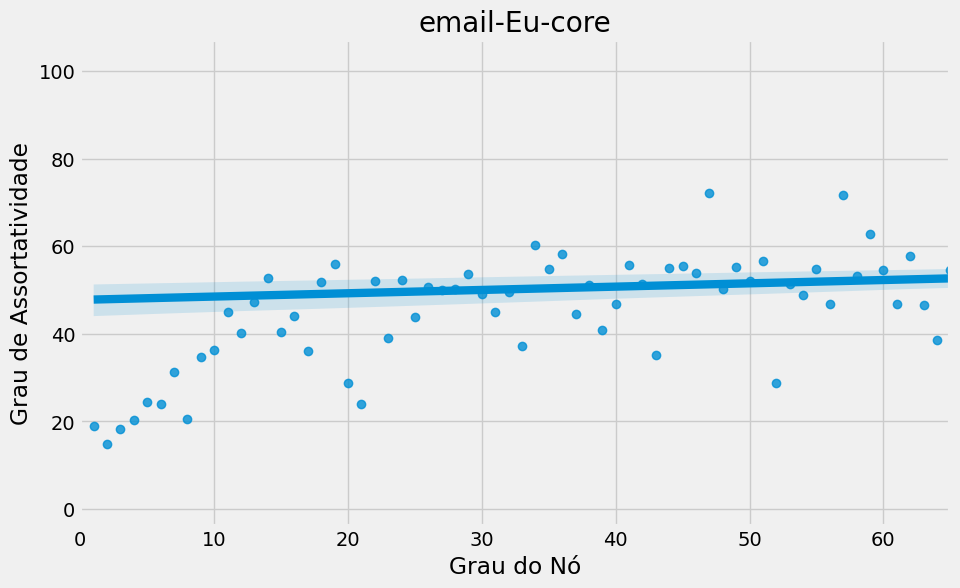

Grafo:  soc-Epinions1

A rede tem 75879 nós e 508837 arestas
Quantidade de vértices: 75879
Quantidade de arestas: 508837
Quantidade de componentes conectados: 2
Tamanho do GCC: 75877
Coeficiente de Clustering: 0.11017387558244757
Coeficiente de Assortatividade: -0.04128630053133655


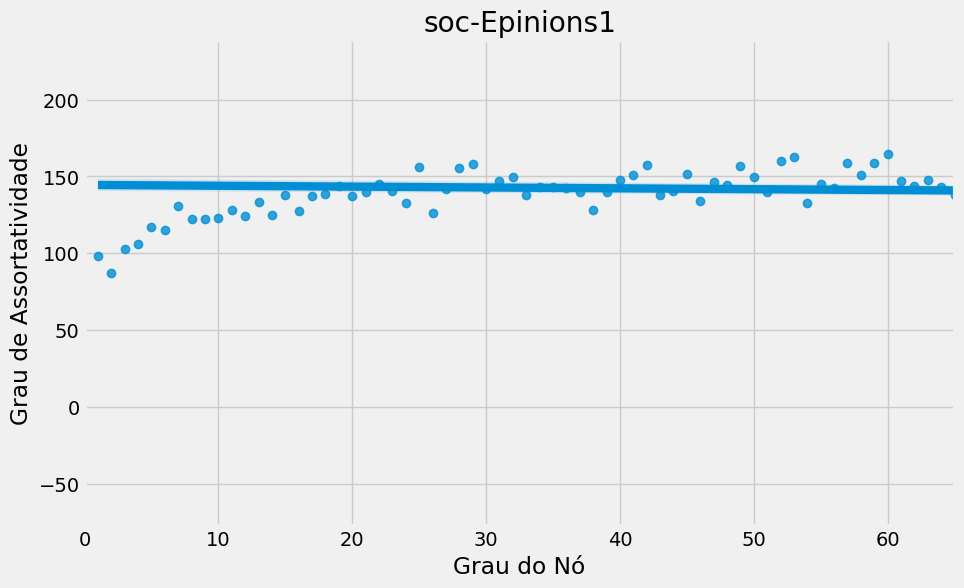

Grafo:  Wiki-Vote

A rede tem 7115 nós e 103689 arestas
Quantidade de vértices: 7115
Quantidade de arestas: 103689
Quantidade de componentes conectados: 24
Tamanho do GCC: 7066
Coeficiente de Clustering: 0.08156344522820935
Coeficiente de Assortatividade: -0.08324455771686787


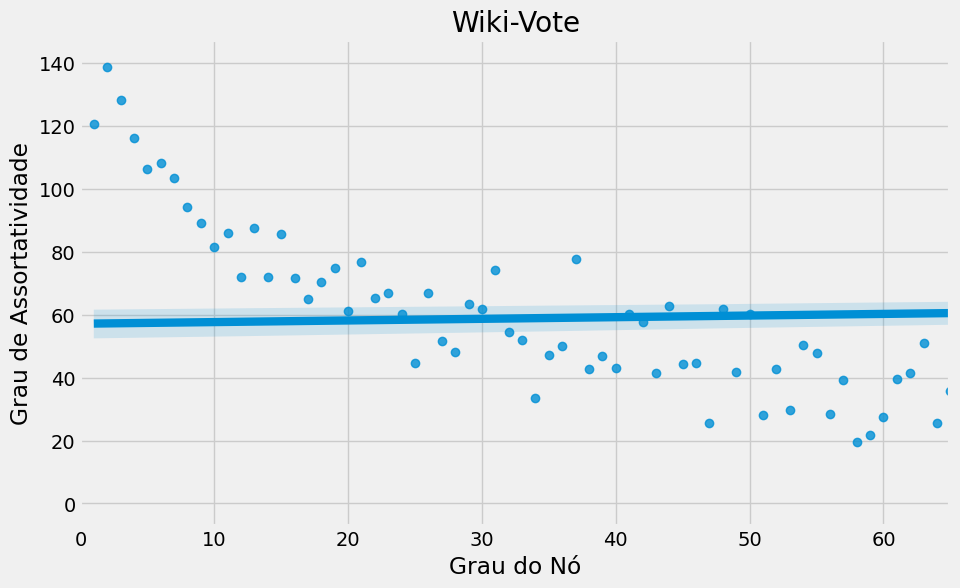

Grafo:  twitter_combined

A rede tem 81306 nós e 1768149 arestas
Quantidade de vértices: 81306
Quantidade de arestas: 1768149
Quantidade de componentes conectados: 1
Tamanho do GCC: 81306
Coeficiente de Clustering: 0.401895267807606
Coeficiente de Assortatividade: -0.02361476256437733


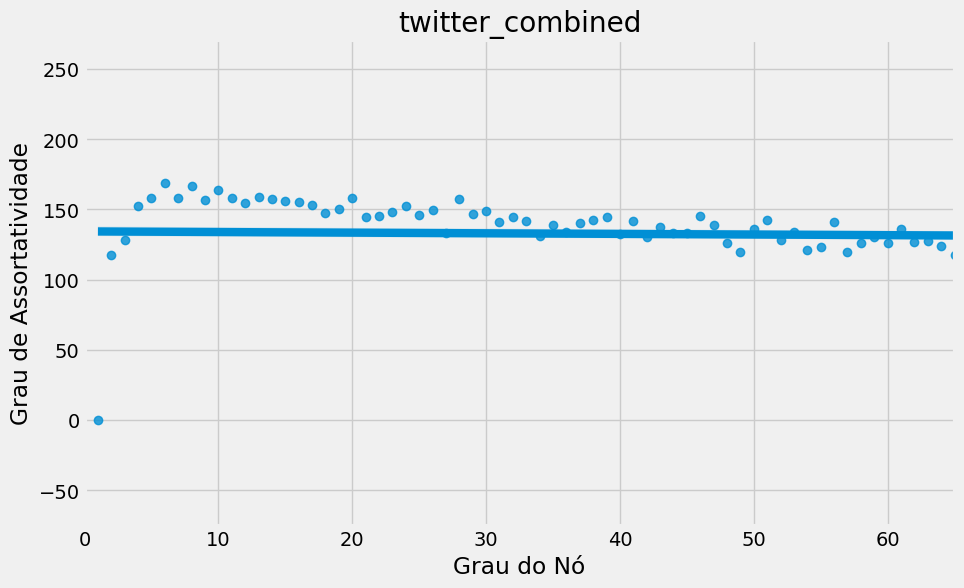

Grafo:  com-youtube

A rede tem 1134890 nós e 2987624 arestas
Quantidade de vértices: 1134890
Quantidade de arestas: 2987624
Quantidade de componentes conectados: 1
Tamanho do GCC: 1134890
Coeficiente de Clustering: 0.04040113888093932
Coeficiente de Assortatividade: -0.028332126333519572


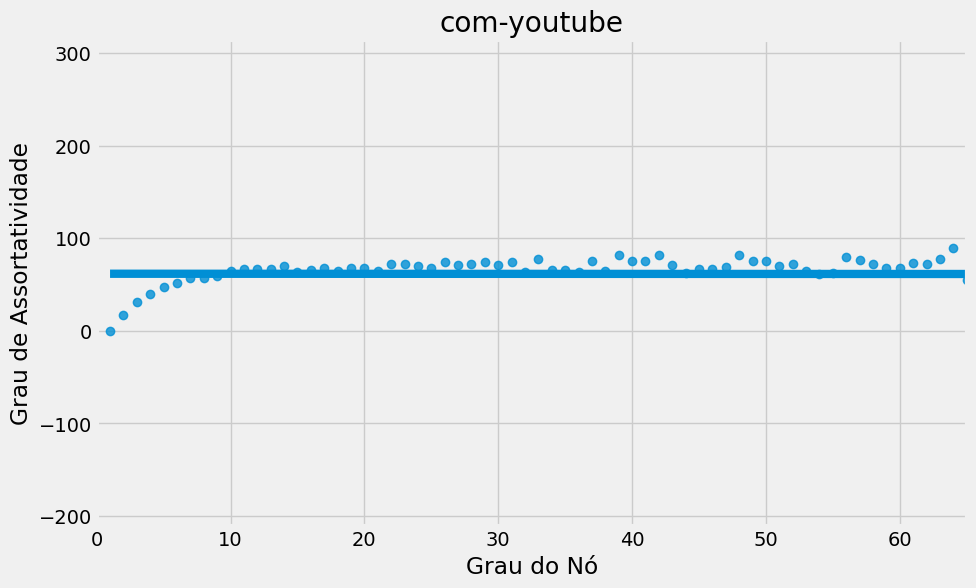

In [51]:
path_list = [r".\email-Eu-core\email-Eu-core.txt",
                r".\soc-Epinions1\soc-Epinions1.txt", 
                r".\wiki-Vote\Wiki-Vote.txt",
                r".\twitter_combined (1).txt\twitter_combined.txt",
                r".\com-youtube.ungraph\com-youtube.ungraph.txt",]


for path in path_list:
    
    get_graph(path)

In [52]:
dict_ = {"Nome": ['email-Eu-core', 'soc-Epinions1','Wiki-Vote', 'twitter_combined', 'com-youtube'],
         "Quantidade de Vértices": [1005, 75879, 7115, 81306, 1134890], "Quantidade de Arestas": [25571, 508837, 103689, 1768149, 2987624], 
"Quantidade de Componentes Conectados": [20, 2, 24, 1, 1], "Tamanho GCC": [986,75877, 7066, 81306, 1134890], 
"Coeficiente de Clustering": [0.3656613629131559, 0.11017387558244757, 0.08156344522820935, 0.401895267807606, 0.04040113888093932], 
"Grau de Assortatividade": [0.005514166137160662, -0.04128630053133655, -0.08324455771686787, -0.02361476256437733, -0.028332126333519572]}

data_df = pd.DataFrame(dict_)

In [53]:
data_df

,Nome,Quantidade de Vértices,Quantidade de Arestas,Quantidade de Componentes Conectados,Tamanho GCC,Coeficiente de Clustering,Grau de Assortatividade
0,email-Eu-core,1005,25571,20,986,0.365661,0.005514
1,soc-Epinions1,75879,508837,2,75877,0.110174,-0.041286
2,Wiki-Vote,7115,103689,24,7066,0.081563,-0.083245
3,twitter_combined,81306,1768149,1,81306,0.401895,-0.023615
4,com-youtube,1134890,2987624,1,1134890,0.040401,-0.028332
